In [0]:
import numpy as np
import pandas as pd

In [0]:
from google.colab import files
upload= files.upload()

Saving Expander_data.csv to Expander_data.csv


In [0]:
exp_df= pd.read_csv('Expander_data.csv')

In [0]:
exp_df.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [0]:
exp_df.shape

(296450, 9)

In [0]:
exp_df.isnull().sum()

Timestamp                          0
Suction Pressure (psig)            0
Suction Temperature (F)            0
Total Flow (gpm)                   0
Speed (rpm)                        0
By-pass Valve Position (%)         0
Discharge Pressure (psig)          0
Discharge Temperature (F)          0
Run Status                    296450
dtype: int64

In [0]:
exp_df.nunique()

Timestamp                      74113
Suction Pressure (psig)       296390
Suction Temperature (F)       295872
Total Flow (gpm)              296410
Speed (rpm)                   296054
By-pass Valve Position (%)     46504
Discharge Pressure (psig)     296431
Discharge Temperature (F)     295893
Run Status                         0
dtype: int64

In [0]:
exp_df.dtypes

Timestamp                       int64
Suction Pressure (psig)       float64
Suction Temperature (F)       float64
Total Flow (gpm)              float64
Speed (rpm)                   float64
By-pass Valve Position (%)    float64
Discharge Pressure (psig)     float64
Discharge Temperature (F)     float64
Run Status                    float64
dtype: object

In [0]:
exp_df['Run Status'].unique()

array([nan])

In [0]:
import datetime as dt
exp_df['Timestamp'] = pd.to_datetime(exp_df['Timestamp'])
exp_df['Timestamp']=exp_df['Timestamp'].map(dt.datetime.toordinal)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

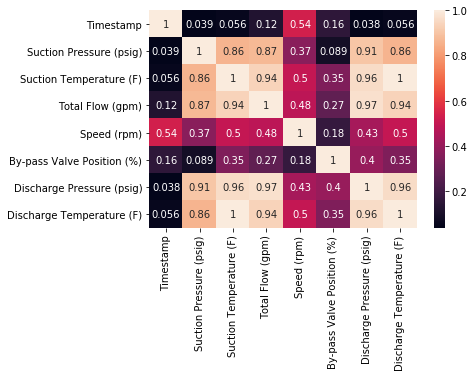

In [0]:
correlationMatrix = exp_df.drop(['Run Status'], axis=1).corr().abs()

sns.heatmap(correlationMatrix, annot= True)

In [0]:
exp_df.columns

Index(['Timestamp', 'Suction Pressure (psig)', 'Suction Temperature (F)',
       'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)',
       'Discharge Pressure (psig)', 'Discharge Temperature (F)', 'Run Status'],
      dtype='object')

In [0]:
exp_df.dtypes

Timestamp                       int64
Suction Pressure (psig)       float64
Suction Temperature (F)       float64
Total Flow (gpm)              float64
Speed (rpm)                   float64
By-pass Valve Position (%)    float64
Discharge Pressure (psig)     float64
Discharge Temperature (F)     float64
Run Status                    float64
dtype: object

In [0]:
exp_df.drop(['Discharge Temperature (F)','Suction Temperature (F)', 'Run Status'], axis=1, inplace= True)

In [0]:
column_name= ['Timestamp', 'Suction Pressure (psig)', 'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)']

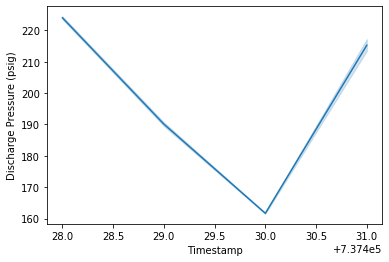

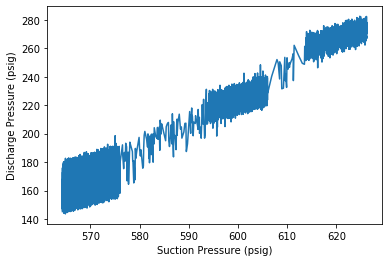

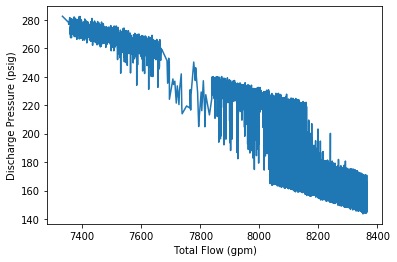

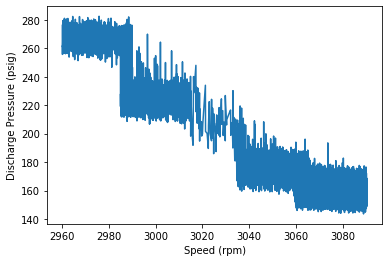

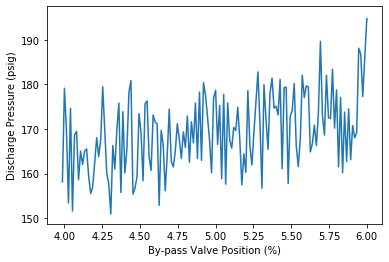

In [0]:
for column in column_name:
  sns.lineplot(column, 'Discharge Pressure (psig)', data= exp_df.head(15000))
  plt.xlabel= column
  plt.ylabel= 'Discharge Pressure (psig)'
  plt.show()

In [0]:
exp_df.describe()

,Timestamp,Suction Pressure (psig),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig)
count,296450.0,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000
mean,719163.0,590.541350,8119.917777,2955.416695,2.005667,186.991087
std,0.0,23.216552,398.049531,54.201467,2.488568,56.205183
min,719163.0,552.420048,7056.004500,2835.750571,-0.200000,69.983885
25%,719163.0,572.757269,7916.322054,2906.336126,0.000000,143.468467
50%,719163.0,586.491792,8144.161813,2961.788792,0.000000,183.270451
75%,719163.0,605.986608,8388.610374,3000.863611,4.000000,223.580205
max,719163.0,649.217417,8975.986378,3090.367995,8.026667,324.411576


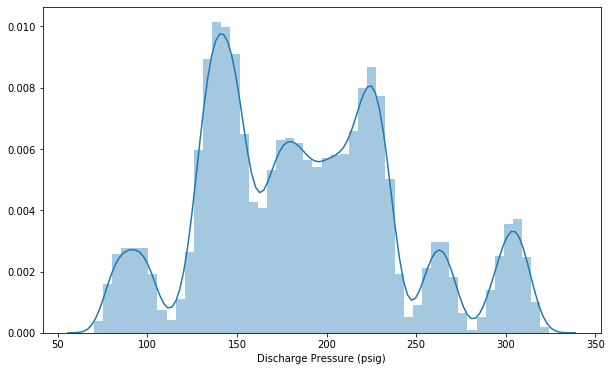

In [0]:
plt.figure(figsize= (10,6))
sns.distplot(exp_df['Discharge Pressure (psig)'])

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
x= exp_df.drop(['Discharge Pressure (psig)'], axis=1)
y= exp_df['Discharge Pressure (psig)']

In [0]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=1)


In [0]:
x_train.shape

(207515, 5)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [0]:
from xgboost import XGBRegressor

In [0]:
from math import sqrt

In [0]:
def analysis(rg):
    model= rg
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    
    print('rmse:',  sqrt(mean_squared_error(y_test, y_pred)))

In [0]:
analysis(LinearRegression(n_jobs=1))

rmse: 2.637144346111256


In [0]:
analysis(DecisionTreeRegressor(min_samples_leaf=3))

rmse: 1.6897145610672268


In [0]:
analysis(RandomForestRegressor(n_estimators=150))

rmse: 1.344635479603032


In [0]:
analysis(XGBRegressor(booster= 'dart'))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:39:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse: 2.2615713603144125


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

Using TensorFlow backend.


In [0]:
from keras import  backend as b
def root_mean_squared_error(y_true, y_pred):
        return b.sqrt(b.mean((y_pred - y_true)**2)) 

In [0]:
model= Sequential([
    Dense(128, activation='relu', input_dim= x_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [0]:
model.compile(
    optimizer='adam',
    loss= root_mean_squared_error,
    metrics=['mean_squared_error'],
)

In [0]:
test=model.fit( 
    x_train,
    y_train,
    epochs=5,
    batch_size= 40,
    validation_data=(x_test, y_test)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 207515 samples, validate on 88935 samples
Epoch 1/5





207515/207515 [==============================] - 29s 138us/step - loss: 456.7207 - mean_squared_error: 923381.6541 - val_loss: 56.2343 - val_mean_squared_error: 3185.9773
Epoch 2/5
207515/207515 [==============================] - 19s 92us/step - loss: 87.5008 - mean_squared_error: 11653.1181 - val_loss: 189.9735 - val_mean_squared_error: 36173.3607
Epoch 3/5
207515/207515 [==============================] - 19s 91us/step - loss: 171.6246 - mean_squared_error: 29827.0951 - val_loss: 126.0366 - val_mean_squared_error: 15966.7231
Epoch 4/5
207515/207515 [==============================] - 19s 91us/step - loss: 66.9973 - mean_squared_error: 4920.6537 - val_loss: 56.0752 - val_mean_squared_error: 3177.3649
Epoch 5/5
207515/207515 [==============================] - 19s 94us/step - loss: 55.8530 - mean_squared_error: 3151.7376 - val_l

In [0]:
#Best model- Random Forest
model= RandomForestRegressor(n_estimators=150)
model.fit(x, y)